In [70]:
import seaborn as sns
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import mir_eval

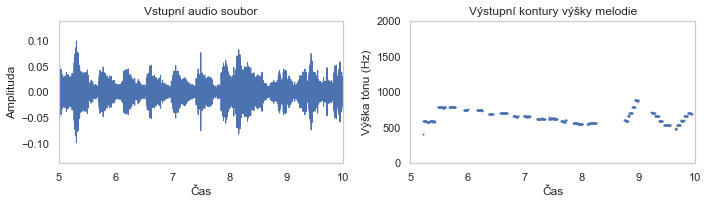

In [71]:
sns.set(rc={'figure.figsize':(10,3)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axs = plt.subplots(1,2, sharex=True)

jazz, sr = librosa.load("../../datasets/medley/MusicDelta_GriegTrolltog_MIX.wav", sr=None)
dur = 15
jazz = jazz[:sr*dur]
librosa.display.waveplot(jazz, sr=sr, ax=axs[0])
t, f = mir_eval.io.load_time_series("../../datasets/medley/MELODY2/MusicDelta_GriegTrolltog_MELODY2.csv", delimiter=",")
# f = mir_eval.util.hz_to_midi(f)
f[f < 10] = None
plt.plot(t, f, ".", markersize=2)
plt.xlim(5, 10)
plt.ylim(0, 2000)


axs[0].set_xlabel("Čas")
axs[0].set_ylabel("Amplituda")
axs[1].set_xlabel("Čas")
axs[1].set_ylabel("Výška tónu (Hz)")

axs[0].set_title("Vstupní audio soubor")
axs[1].set_title("Výstupní kontury výšky melodie")


plt.tight_layout()
#sns.lineplot(t, f)
fig.savefig("../tex/img/input_output.pdf", bbox_inches="tight")

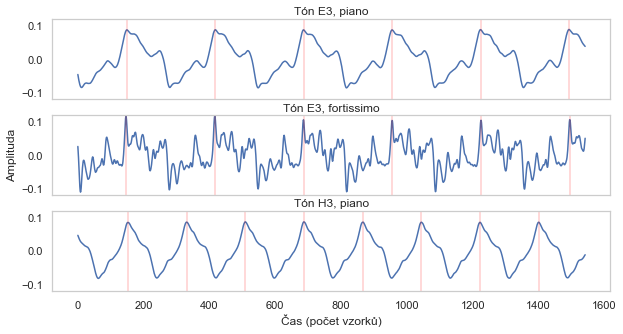

In [85]:
y_A3_p, sr = librosa.load("./clarinet_E3_1_piano_normal.mp3", sr=None)
y_A3_f, sr = librosa.load("./clarinet_E3_1_fortissimo_normal.mp3", sr=None)
y_E4, sr = librosa.load("./clarinet_B3_1_piano_normal.mp3", sr=None)

title1 = "Tón E3, piano"
title2 = "Tón E3, fortissimo"
title3 = "Tón H3, piano"

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axs = plt.subplots(3,1, sharex=True, sharey=True)
off = 10182
s1 = off
s2 = off+55
s3 = off+55
l = int(sr*0.035)
y_A3_p_ex = y_A3_p[s1:s1+l]
y_A3_f_ex = y_A3_f[s2:s2+l]
y_E4_p_ex = y_E4[s3:s3+l]
sns.lineplot(x=np.arange(len(y_A3_p_ex)), y=y_A3_p_ex, ax=axs[0])
sns.lineplot(x=np.arange(len(y_A3_f_ex)), y=y_A3_f_ex, ax=axs[1])
sns.lineplot(x=np.arange(len(y_E4_p_ex)), y=y_E4_p_ex, ax=axs[2])

alpha = 0.2

plt.ylim(-0.12, 0.12)

plt.xlabel("Čas (počet vzorků)")
axs[1].set_ylabel("Amplituda")

axs[0].set_title(title1, y=0.98)
axs[1].set_title(title2, y=0.98)
axs[2].set_title(title3, y=0.98)

peaks, _ = find_peaks(y_A3_p_ex, height=0.08)
plt.sca(axs[0])
#plt.xlabel("afda")
for p in peaks:
    plt.axvline(p, 1,-1, color="red", alpha=alpha)

peaks, _ = find_peaks(y_A3_f_ex, height=0.1)
plt.sca(axs[1])
for p in peaks:
    plt.axvline(p, 1,-1, color="red", alpha=alpha)

peaks, _ = find_peaks(y_E4_p_ex, height=0.05, distance=10)
plt.sca(axs[2])
for p in peaks:
    plt.axvline(p, 1,-1, color="red", alpha=alpha)

fig.savefig("../tex/img/audio_clarinet.pdf", bbox_inches="tight")

(array([   0.,  500., 1000., 1500., 2000., 2500.]), <a list of 0 Text yticklabel objects>)


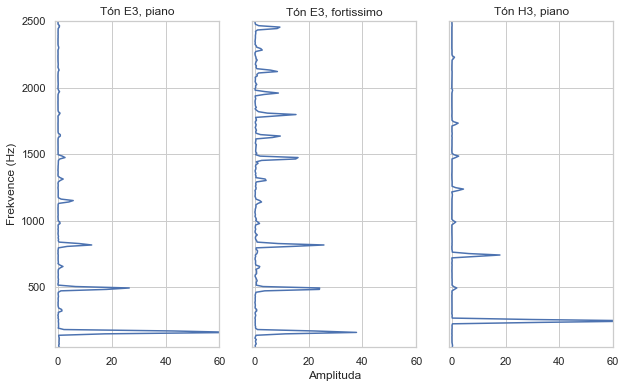

In [73]:

sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
off = 10182
s1 = off
s2 = off+41
s3 = off+64
l = 4096
y_A3_p_ex = y_A3_p[s1:s1+l]
y_A3_f_ex = y_A3_f[s2:s2+l]
# lol, fejkuju 2. harmonickou :(( cena za názornost, achjo
y_E4_p_ex = y_E4[s3:s3+l] + 0.002*np.sin(2*np.pi*np.arange(l)/44100.0*246.942*2)

def show_fft(sig, ax, f0, title):
    ax.set_title(title)
    fft1 = np.fft.rfft(sig * np.hamming(l))

    f = np.linspace(0, sr/2, len(fft1))

    fft1 = np.abs(fft1)
    #fft1 = 20*np.log10(fft1/max(fft1))
    sns.lineplot(x=fft1, y=f, ax=ax, sort=False)
    #ax.grid(True, "both")
    # ax.set_ylim(100, 2500)
    #ax.set_yticks(np.arange(0, 3000, 50), False)
    #ax.yaxis.set_minor_formatter(None)


    alpha = 0.2
    #plt.sca(ax)
    #for i in range(1, 20):
    #    plt.axhline(f0*i, 100, -100, color="red", alpha=alpha)

show_fft(y_A3_p_ex, axs[0], 220, title1)
show_fft(y_A3_f_ex, axs[1], 218.7, title2)
show_fft(y_E4_p_ex, axs[2], 331, title3)

axs[0].set_ylabel("Frekvence (Hz)")
# axs[1].set_ylabel("Amplituda (dBFS)")
axs[1].set_xlabel("Amplituda")

#plt.sca(axes[1, 1])
plt.xlim(-1, 60)
plt.ylim(50, 2500)
#plt.yticks(np.arange(0.0, 3000, 500))
print(plt.yticks())

fig.savefig("../tex/img/audio_clarinet_dft.pdf", bbox_inches="tight")

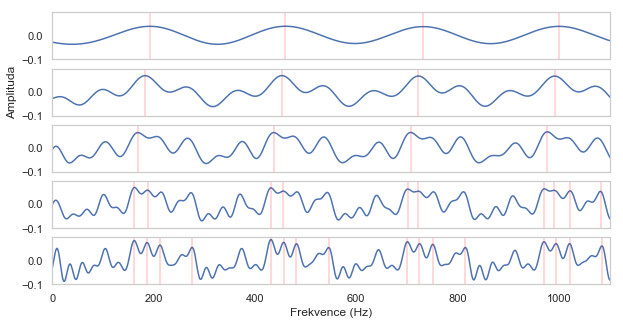

In [74]:

# sns.set(rc={'figure.figsize':(10,5)})
# sns.set_style("whitegrid", {'axes.grid' : False})

# fig, axs = plt.subplots(5,1, sharex=True, sharey=True)
# off = 10182
# s1 = off
# s2 = off+41
# s3 = off+64
# l = 4096
# y_A3_p_ex = y_A3_p[s1:s1+l]
# y_A3_f_ex = y_A3_f[s2:s2+l]
# y_E4_p_ex = y_E4[s3:s3+l]

# def show_fft(sig, ax, f0, n, title, height=0.05):
#     # ax.set_title(title, y=0.98)
#     fft = np.fft.rfft(sig)
#     f = np.linspace(0, sr/2, len(fft))
#     fft[-len(fft)+np.digitize(f0*n, f)+3:] = 0
#     sig2 = np.fft.irfft(fft)
#     #magnitude, phase = librosa.magphase(fft)
#     #phase = np.angle(phase)
#     #sig2 = np.sum([magnitude[np.digitize(f0*i, f)].real*np.sin(phase[np.digitize(f0*i, f)].imag+np.arange(0, 1200)/44100*2*np.pi*f0*i) for i in range(1,n+1)], 0)

#     sns.lineplot(x=np.arange(len(sig2)), y=sig2, ax=ax)
#     ax.set_xlim(0, sr*0.025)
    
#     alpha = 0.2
#     peaks, _ = find_peaks(sig2, height=height)
#     plt.sca(ax)
#     #plt.xlabel("afda")
#     for p in peaks:
#         plt.axvline(p, 1,-1, color="red", alpha=alpha)

# show_fft(y_A3_f_ex, axs[0], 218.7,1, "Tón A3, 1 harmonická frekvence", height=0.01)
# show_fft(y_A3_f_ex, axs[1], 218.7,3, "Tón A3, 3 harmonické frekvence")
# show_fft(y_A3_f_ex, axs[2], 218.7,5, "Tón A3, 5 harmonických frekvencí")
# show_fft(y_A3_f_ex, axs[3], 218.7,7, "Tón A3, 7 harmonických frekvencí")
# show_fft(y_A3_f_ex, axs[4], 218.7,9, "Tón A3, 9 harmonických frekvencí")

# plt.xlabel("Frekvence (Hz)")
# axs[1].set_ylabel("Amplituda")

# fig.savefig("../tex/img/audio_clarinet_dft_mix.pdf", bbox_inches="tight")

/home/jirka/miniconda3/lib/python3.7/site-packages/mir_eval/util.py:942: RuntimeWarning: divide by zero encountered in log2
  return 12.0 * (np.log2(freqs) - np.log2(440.0)) + 69.0


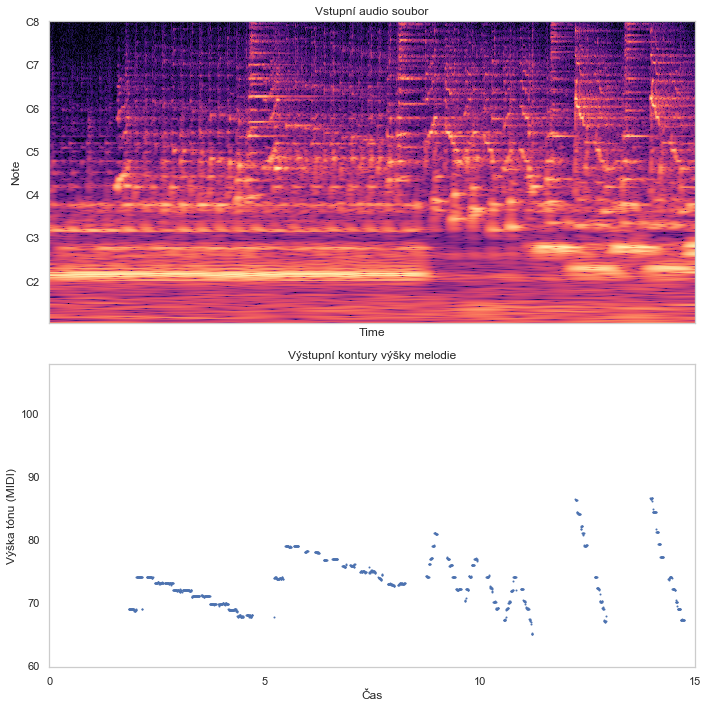

In [75]:
# sns.set(rc={'figure.figsize':(10,10)})
# sns.set_style("whitegrid", {'axes.grid' : False})

# fig, axs = plt.subplots(2,1, sharex=True)

# jazz, sr = librosa.load("../../datasets/medley/MusicDelta_GriegTrolltog_MIX.wav", sr=None)
# dur = 15
# jazz = jazz[:sr*dur]
# bpo = 60
# cqt = librosa.amplitude_to_db(np.abs(librosa.core.cqt(jazz, sr=sr, bins_per_octave=bpo, n_bins=420)))
# librosa.display.specshow(cqt, sr=sr, ax=axs[0], x_axis='time', y_axis='cqt_note', bins_per_octave=bpo)
# t, f = mir_eval.io.load_time_series("../../datasets/medley/MELODY2/MusicDelta_GriegTrolltog_MELODY2.csv", delimiter=",")
# f = mir_eval.util.hz_to_midi(f)
# f[f < 10] = None
# plt.plot(t, f, ".", markersize=2)
# #plt.xlim(7, 11)
# #plt.ylim(65, 85)


# #axs[0].set_xlabel("Čas")
# #axs[0].set_ylabel("Amplituda")
# axs[1].set_xlabel("Čas")
# axs[1].set_ylabel("Výška tónu (MIDI)")

# axs[0].set_title("Vstupní audio soubor")
# axs[1].set_title("Výstupní kontury výšky melodie")


# plt.tight_layout()
# #sns.lineplot(t, f)
# fig.savefig("../tex/img/input_output_spec.pdf", bbox_inches="tight")

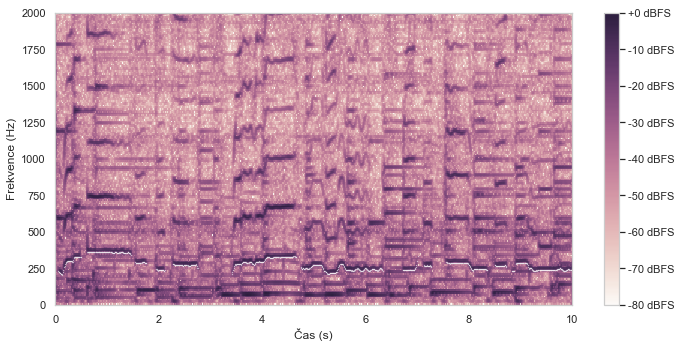

In [76]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axs = plt.subplots(1,1, sharex=True, sharey=True)

# audio, sr = librosa.load("../../datasets/mdb-synth/MDB-mf0-synth/audio_mix/MusicDelta_Hendrix_MIX_mf0synth.wav", sr=None)
audio, sr = librosa.load("../../datasets/mirex05TrainFiles/train01.wav", sr=None)
dur = 10
audio = audio[:sr*dur]


spectrogram = librosa.amplitude_to_db(np.abs(librosa.core.stft(audio, 4096, 512)), ref=np.max)

#plt.sca(axs[0])
# librosa.display.specshow(spectrogram, x_axis='time', y_axis='linear')
cmap = sns.cubehelix_palette(light=0.98, reverse=False, as_cmap=True)

plt.imshow(spectrogram, cmap=cmap, aspect="auto", origin="lower", extent=(0, dur, 0, sr/2))
plt.xlim(0, dur)
plt.ylim(0, 2000)


# plt.sca(axs[1])
# t, f = mir_eval.io.load_ragged_time_series("../../datasets/mdb-synth/MDB-mf0-synth/annotation_mf0/MusicDelta_Hendrix_MIX_mf0synth.csv", delimiter="\t")
t, f = mir_eval.io.load_time_series("../../datasets/mirex05TrainFiles/train01REF.txt", delimiter="\t")
#f = mir_eval.util.hz_to_midi(f)
f[f == 0] = None
plt.plot(t, f-8, ".w", markersize=0.5)
#plt.plot(t, f+22, ".w", markersize=0.5)
# plt.grid(True)
#plt.xlim(7, 11)
#plt.ylim(65, 85)
plt.colorbar(format='%+2.0f dBFS')

plt.xlabel("Čas (s)")
plt.ylabel("Frekvence (Hz)")

#axs[0].set_xlabel("Čas")
#axs[0].set_ylabel("Amplituda")
#axs[1].set_xlabel("Čas")
#axs[1].set_ylabel("Výška tónu (MIDI)")

#axs[0].set_title("Vstupní audio soubor")
#axs[1].set_title("Výstupní kontury výšky melodie")


plt.tight_layout()
#sns.lineplot(t, f)
fig.savefig("../tex/img/audio_mix_stft.pdf", bbox_inches="tight")

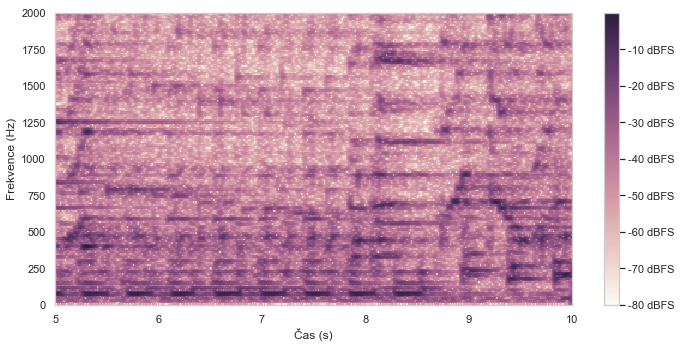

In [77]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axs = plt.subplots(1,1, sharex=True, sharey=True)

# audio, sr = librosa.load("../../datasets/mdb-synth/MDB-mf0-synth/audio_mix/MusicDelta_Hendrix_MIX_mf0synth.wav", sr=None)
audio, sr = librosa.load("../../datasets/medley/MusicDelta_GriegTrolltog_MIX.wav", sr=None)
dur = 10
audio = audio[:sr*dur]


spectrogram = librosa.amplitude_to_db(np.abs(librosa.core.stft(audio, 4096, 512)), ref=np.max)

#plt.sca(axs[0])
# librosa.display.specshow(spectrogram, x_axis='time', y_axis='linear')
cmap = sns.cubehelix_palette(light=0.98, reverse=False, as_cmap=True)

plt.imshow(spectrogram, cmap=cmap, aspect="auto", origin="lower", extent=(0, dur, 0, sr/2))
plt.xlim(5, dur)
plt.ylim(0, 2000)


# plt.sca(axs[1])
# t, f = mir_eval.io.load_ragged_time_series("../../datasets/mdb-synth/MDB-mf0-synth/annotation_mf0/MusicDelta_Hendrix_MIX_mf0synth.csv", delimiter="\t")
t, f = mir_eval.io.load_time_series("../../datasets/medley/MELODY2/MusicDelta_GriegTrolltog_MELODY2.csv", delimiter=",")
#f = mir_eval.util.hz_to_midi(f)
f[f == 0] = None
#plt.plot(t, f-8, ".g", markersize=2)#
#plt.plot(t, f+22, ".w", markersize=0.5)
# plt.grid(True)
#plt.xlim(7, 11)
#plt.ylim(65, 85)
plt.colorbar(format='%+2.0f dBFS')

plt.xlabel("Čas (s)")
plt.ylabel("Frekvence (Hz)")

#axs[0].set_xlabel("Čas")
#axs[0].set_ylabel("Amplituda")
#axs[1].set_xlabel("Čas")
#axs[1].set_ylabel("Výška tónu (MIDI)")

#axs[0].set_title("Vstupní audio soubor")
#axs[1].set_title("Výstupní kontury výšky melodie")


plt.tight_layout()
#sns.lineplot(t, f)
fig.savefig("../tex/img/audio_mix_stft_2.pdf", bbox_inches="tight")

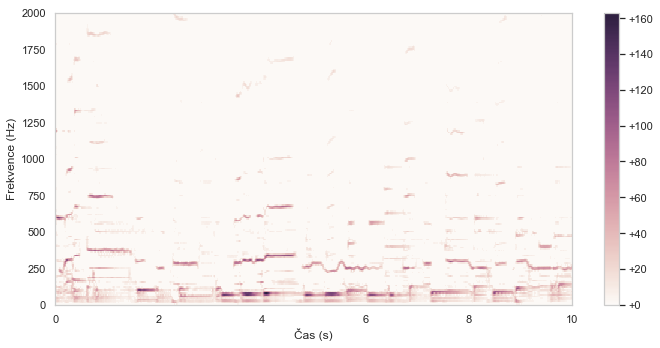

In [78]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, axs = plt.subplots(1,1, sharex=True, sharey=True)

# audio, sr = librosa.load("../../datasets/mdb-synth/MDB-mf0-synth/audio_mix/MusicDelta_Hendrix_MIX_mf0synth.wav", sr=None)
audio, sr = librosa.load("../../datasets/mirex05TrainFiles/train01.wav", sr=None)
dur = 10
audio = audio[:sr*dur]

n_fft = 4096
spectrogram = np.abs(librosa.core.stft(audio, n_fft, 512))

#plt.sca(axs[0])
# librosa.display.specshow(spectrogram, x_axis='time', y_axis='linear')
cmap = sns.cubehelix_palette(light=0.98, reverse=False, as_cmap=True)

freqs = librosa.core.fft_frequencies(sr, n_fft=n_fft)

#harms = [0.25, 0.333, 0.5, 1, 2, 3, 4, 5, 6]
#weights = [-0.25, -0.33, -0.5, 1.0, 0.5, 0.33, 0.25, 0.1, 0.1]
harms = [0.33, 0.5, 1, 2, 3, 4, 5, 6]
weights = [-0.3, -0.5, 1.0, 0.3, 0.33, 0.25, 0.1, 0.1]

salience = librosa.core.salience(spectrogram, freqs, harms, weights=weights, aggregate=None, fill_value=0, filter_peaks=False)
salience[salience < 5] = 0
#salience = librosa.amplitude_to_db(salience, ref=np.max)
plt.imshow(salience, cmap=cmap, aspect="auto", origin="lower", extent=(0, dur, 0, sr/2))
plt.xlim(0, dur)
plt.ylim(0, 2000)


plt.colorbar(format='%+2.0f')

plt.xlabel("Čas (s)")
plt.ylabel("Frekvence (Hz)")


plt.tight_layout()
#sns.lineplot(t, f)
fig.savefig("../tex/img/salience.pdf", bbox_inches="tight")